In [1]:
import torch
import torchvision
import torchvision.datasets as datasets
import sys
import numpy as np
import torch.utils.data as utils
from colour import Color
red = Color("red")
colors = list(red.range_to(Color("blue"),10))
colors = [x.get_rgb() for x in colors]
from os.path import join as oj
import matplotlib.pyplot as plt
%matplotlib inline




In [ ]:
import torch
import torchvision
import torchvision.datasets as datasets
import sys
import numpy as np
import torch.utils.data as utils
from colour import Color
red = Color("red")
colors = list(red.range_to(Color("blue"),10))
colors = [x.get_rgb() for x in colors]
from os.path import join as oj
mnist_trainset = datasets.MNIST(root='../data', train=True, download=True, transform=None)
color_x = np.zeros((60000, 3, 28, 28))


for i in range(10):
    color_x[np.where((mnist_trainset.train_labels ==i)) ] = (mnist_trainset.data[np.where((mnist_trainset.train_labels ==i))].numpy().astype(np.float32)[:, np.newaxis, :,:]*np.asarray(colors[i])[None, :, None, None])




color_y = mnist_trainset.train_labels.numpy().copy()

color_x /=color_x.max()
color_x = color_x*2 -1
np.save(oj("../data/ColorMNIST", "train_x.npy"), color_x)
np.save(oj("../data/ColorMNIST", "train_y.npy"), color_y)


mnist_trainset = datasets.MNIST(root='../data', train=False, download=True, transform=None)
color_x = np.zeros((10000, 3, 28, 28))
for i in range(10):
    color_x[np.where((mnist_trainset.train_labels ==i)) ] = (mnist_trainset.data[np.where((mnist_trainset.train_labels ==i))].numpy().astype(np.float32)[:, np.newaxis, :,:]*np.asarray(colors[9-i])[None, :, None, None])
color_y = mnist_trainset.train_labels.numpy().copy()
color_x /=color_x.max()
color_x = color_x*2 -1
np.save(oj("../data/ColorMNIST", "test_x.npy"),  color_x)
np.save(oj("../data/ColorMNIST", "test_y.npy"), color_y)
np.save(oj("../data/ColorMNIST", "test_y_color.npy"), 9-color_y)
print("Saved color MNIST")

mnist_trainset = datasets.MNIST(root='../data', train=False, download=True, transform=None)
color_x = np.zeros((10000, 3, 28, 28))
for i in range(10):
    color_x[np.where((mnist_trainset.train_labels ==i)) ] = (mnist_trainset.data[np.where((mnist_trainset.train_labels ==i))].numpy().astype(np.float32)[:, np.newaxis, :,:]*np.asarray(colors[i])[None, :, None, None])
color_y = mnist_trainset.train_labels.numpy().copy()
color_x /=color_x.max()
color_x = color_x*2 -1
np.save(oj("../data/ColorMNIST", "test_x_random.npy"),  color_x)
np.save(oj("../data/ColorMNIST", "test_y_random.npy"), color_y)

7

In [5]:
mnist_trainset = datasets.MNIST(root='../data', train=False, download=True, transform=None)
color_x = np.zeros((10000, 3, 28, 28))
for i in range(10000):
    color_x[i ] = (mnist_trainset.data[i].numpy().astype(np.float32)[np.newaxis, :,:]*np.asarray(colors[np.random.choice(10)])[:, None, None])
color_y = mnist_trainset.train_labels.numpy().copy()
color_x /=color_x.max()
color_x = color_x*2 -1
np.save(oj("../data/ColorMNIST", "test_x_random.npy"),  color_x)
np.save(oj("../data/ColorMNIST", "test_y_random.npy"), color_y)

In [62]:
mnist_trainset = datasets.MNIST(root='../data', train=True, download=True, transform=None)
color_x = np.zeros((60000, 3, 28, 28))
for i in range(10):
    color_x[np.where((mnist_trainset.train_labels ==i)) ] = (mnist_trainset.data[np.where((mnist_trainset.train_labels ==i))].numpy().astype(np.float32)[:, np.newaxis, :,:]*np.asarray(colors[i])[None, :, None, None])

color_x /=color_x.max()
color_y = mnist_trainset.train_labels.numpy().copy()


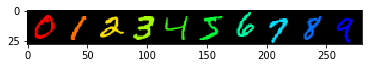

In [63]:

train_examples = np.zeros((28, 28*10, 3))
for i in range(10):

    train_examples[:,i*28:(i+1)*28]=color_x[np.where(color_y ==i)[0][0]].swapaxes(0,2).swapaxes(0,1)

    
    
plt.imshow(train_examples)

In [64]:
mnist_trainset = datasets.MNIST(root='../data', train=False, download=True, transform=None)
color_y = mnist_trainset.train_labels.numpy().copy()
color_x = np.zeros((10000, 3, 28, 28))
for i in range(10):
    color_x[np.where((mnist_trainset.train_labels ==i)) ] = (mnist_trainset.data[np.where((mnist_trainset.train_labels ==i))].numpy().astype(np.float32)[:, np.newaxis, :,:]*np.asarray(colors[9-i])[None, :, None, None])
    color_x[np.where((mnist_trainset.train_labels ==i)) ]
color_y = mnist_trainset.train_labels.numpy().copy()
color_x /=color_x.max()




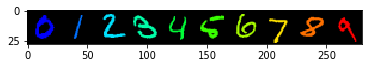

In [65]:

test_examples = np.zeros((28, 28*10, 3))
for i in range(10):

    test_examples[:,i*28:(i+1)*28]=color_x[np.where(color_y ==i)[0][0]].swapaxes(0,2).swapaxes(0,1)
plt.imshow(test_examples)   
    
    

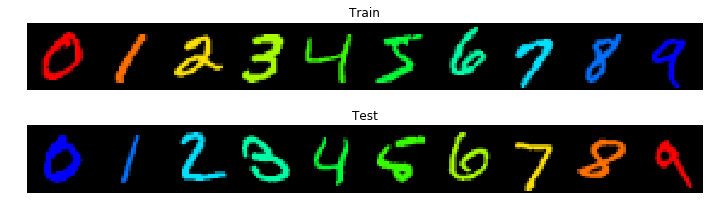

In [80]:
fig, axes = plt.subplots(ncols =1, nrows =2, figsize = (10,3))
axes[0].imshow(train_examples)
axes[0].set_title("Train")

axes[0].axis('off');
axes[1].imshow(test_examples)
axes[1].set_title("Test")
plt.axis('off');
plt.tight_layout()
fig.savefig("ColorMNIST_examples.png")